In [1]:
import pandas as pd
import seaborn as sns
import gspread
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('https://stepik.org/media/attachments/lesson/361618/step_1_lesson_7.csv')
df.head()

,date,user_type,visits
0,2020-06-15,People,417.0
1,2020-06-15,Robots,177.0
2,2020-06-16,People,472.0
3,2020-06-16,Robots,91.0
4,2020-06-17,People,475.0


In [3]:
'''
7-2-1
Для начала, давайте посмотрим на распределение посещений сайта по дням. Постройте график с распределением количества 
посещений от ботов и обычных пользователей сайта Яндекс.Метрика.
'''

'\n7-2-1\nДля начала, давайте посмотрим на распределение посещений сайта по дням. Постройте график с распределением количества \nпосещений от ботов и обычных пользователей сайта Яндекс.Метрика.\n'

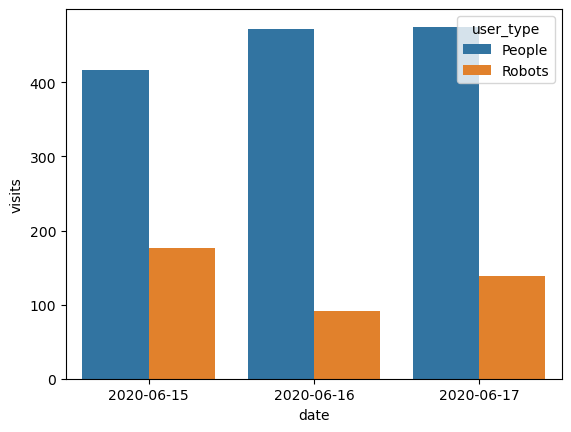

In [4]:
sns.barplot(x=df.date, y=df.visits, hue=df.user_type)
plt.show()

In [5]:
'''
Наименьшее число посещений пользователей-людей наблюдается 15 июня
Наибольшая разница между числом посещений людьми и ботами наблюдается 16 июня
15 июня сайт посетило наибольшее число ботов
15 июня ботов было примерно в два раза больше, чем 16 июня
'''

'\nНаименьшее число посещений пользователей-людей наблюдается 15 июня\nНаибольшая разница между числом посещений людьми и ботами наблюдается 16 июня\n15 июня сайт посетило наибольшее число ботов\n15 июня ботов было примерно в два раза больше, чем 16 июня\n'

In [6]:
'''
7-2-3
Определите процент посещений сайта Яндекс.Метрики с бразузера Google Chrome. Данные лежат здесь.

Ответ округлите до целого.'''

'\n7-2-3\nОпределите процент посещений сайта Яндекс.Метрики с бразузера Google Chrome. Данные лежат здесь.\n\nОтвет округлите до целого.'

In [7]:
df2=pd.read_csv('https://stepik.org/media/attachments/lesson/361618/step_2_lesson_7.csv')
df2.head()

,date,browser,visits
0,2020-06-15,Google Chrome,354.0
1,2020-06-15,Firefox,58.0
2,2020-06-15,Yandex Browser,54.0
3,2020-06-15,Safari,41.0
4,2020-06-15,Chrome Mobile,31.0


In [8]:
br_chrome = df2.query('browser=="Google Chrome"').visits.sum()
br_chrome

354.0

In [9]:
result = (br_chrome/df2.visits.sum()*100)
result.round()

60.0

In [10]:
'''7-2-4
Давайте выясним, с какого браузера приходит больше всего ботов. Посмотрите на данные и определите, 
у какого браузера самая большая доля посещений сайта ботами от общего числа посещений в этом браузере?

В качестве ответа укажите название браузера.'''

'7-2-4\nДавайте выясним, с какого браузера приходит больше всего ботов. Посмотрите на данные и определите, \nу какого браузера самая большая доля посещений сайта ботами от общего числа посещений в этом браузере?\n\nВ качестве ответа укажите название браузера.'

In [11]:
'''Сгруппируйте данные по браузерам и для каждого типа посчитайте сумму посещений (то есть все посещения, 
осуществлённые с этого браузера). Далее смёрджите этот датафрэйм с исходным по колонке с типом браузера. 
После этого разделите число посещений, разделённое по типу пользователя, на число посещений с этого браузера. 
То есть получите долю посещений от роботов и людей для каждого браузера. Потом возьмите браузер с максимальной долей'''

'Сгруппируйте данные по браузерам и для каждого типа посчитайте сумму посещений (то есть все посещения, \nосуществлённые с этого браузера). Далее смёрджите этот датафрэйм с исходным по колонке с типом браузера. \nПосле этого разделите число посещений, разделённое по типу пользователя, на число посещений с этого браузера. \nТо есть получите долю посещений от роботов и людей для каждого браузера. Потом возьмите браузер с максимальной долей'

In [12]:
group_bro=df2.groupby('browser',as_index=False).agg({'visits':'sum'})

In [13]:
df3=pd.read_csv('https://stepik.org/media/attachments/lesson/361618/step_3_lesson_7.csv')
df3.head()

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0


In [14]:
group_bro=df3.groupby('browser',as_index=False).agg({'visits':'sum'}).rename(columns = {'visits':'visits_all'})
group_bro.head()

,browser,visits_all
0,Android Browser,1.0
1,Chrome Mobile,31.0
2,Chromium,2.0
3,CocCoc,1.0
4,Edge,5.0


In [15]:
bots = df3.query('user_type == "Robots"')

In [16]:
merg = group_bro.merge(bots, on='browser')
merg.head()

,browser,visits_all,date,user_type,visits
0,Chromium,2.0,2020-06-15,Robots,1.0
1,Edge,5.0,2020-06-15,Robots,1.0
2,Firefox,58.0,2020-06-15,Robots,31.0
3,Google Chrome,354.0,2020-06-15,Robots,104.0
4,Mobile Safari,16.0,2020-06-15,Robots,1.0


In [17]:
merg['perc'] = (merg.visits / merg.visits_all)*100
merg.sort_values('perc',ascending=False)[:1].browser

8    UCWEB
Name: browser, dtype: object

In [18]:
'''
7-2-5
Выгрузите данные, содержащие информацию о дне, типе пользователя, браузере. Создайте колонку с метрикой доли заходов 
на сайт для каждого из этих разрезов.

В ответе укажите процент открытий сайта настоящими пользователями Safari (не ботами) с точностью до 1 знака после точки.

Hint: обратите внимание, здесь вам нужно найти долю заходов конкретных типов пользователей с конкретного браузера от 
вообще всех-всех заходов на сайт за этот день.'''

'\n7-2-5\nВыгрузите данные, содержащие информацию о дне, типе пользователя, браузере. Создайте колонку с метрикой доли заходов \nна сайт для каждого из этих разрезов.\n\nВ ответе укажите процент открытий сайта настоящими пользователями Safari (не ботами) с точностью до 1 знака после точки.\n\nHint: обратите внимание, здесь вам нужно найти долю заходов конкретных типов пользователей с конкретного браузера от \nвообще всех-всех заходов на сайт за этот день.'

In [19]:
df4=pd.read_csv('https://stepik.org/media/attachments/lesson/361618/step_4_lesson_7.csv')
df4.head()

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0


In [20]:
'''Посчитайте процент пользователей в каждой из групп (комбинация браузера и типа пользователей), округлите до 1 знака 
и укажите процент пользователей-людей с браузером Safari

Разделите колонку на сумму по этой же колонке, а затем умножьте на 100'''

'Посчитайте процент пользователей в каждой из групп (комбинация браузера и типа пользователей), округлите до 1 знака \nи укажите процент пользователей-людей с браузером Safari\n\nРазделите колонку на сумму по этой же колонке, а затем умножьте на 100'

In [21]:
sum_visits=df4.visits.sum()
sum_visits

594.0

In [22]:
df_group_user_type = df4.groupby(['browser', 'user_type'],as_index=False).agg({'visits':'sum'})
df_group_user_type

,browser,user_type,visits
0,Android Browser,People,1.0
1,Chrome Mobile,People,31.0
2,Chromium,People,1.0
3,Chromium,Robots,1.0
4,CocCoc,People,1.0
5,Edge,People,4.0
6,Edge,Robots,1.0
7,Firefox,People,27.0
8,Firefox,Robots,31.0
9,Google Chrome,People,250.0


In [23]:
(df4.query('browser=="Safari" & user_type=="People"').visits/sum_visits).mul(100).round(1)

7    3.2
Name: visits, dtype: float64

In [24]:
'''
7-2-6
💀 Сложное задание! 💀

При помощи библиотеки gspread отправьте данные из предыдущего шага в Google SpreadSheet. Далее отправьте ссылку на 
получившийся файл в Google SpreadSheet (не забудьте открыть доступ по ссылке, это можно сделать вручную, когда данные 
уже зальются в таблицу) при помощи VK API себе в личку ВКонтакте. 

В ответе напишите слово Да, если всё сделали :)'''

'\n7-2-6\n💀 Сложное задание! 💀\n\nПри помощи библиотеки gspread отправьте данные из предыдущего шага в Google SpreadSheet. Далее отправьте ссылку на \nполучившийся файл в Google SpreadSheet (не забудьте открыть доступ по ссылке, это можно сделать вручную, когда данные \nуже зальются в таблицу) при помощи VK API себе в личку ВКонтакте. \n\nВ ответе напишите слово Да, если всё сделали :)'

In [25]:
#! pip install df2gspread

In [26]:
import gspread
import os
from df2gspread import df2gspread as d2g
from oauth2client.service_account import ServiceAccountCredentials

In [27]:
df_group_user_type.to_csv('my.csv')

In [28]:
"client_email": "skitatest@level-storm-380712.iam.gserviceaccount.com"

SyntaxError: illegal target for annotation (963875927.py, line 1)

In [ ]:
# Укажите путь к вашему файлу с учетными данными
path_to_credential = r'F:\prefab.json' 

# Укажите имя таблицы в гугл листах
table_name = 'my'

scope = ['https://spreadsheets.google.com/feeds',
         'https://www.googleapis.com/auth/drive']

credentials = ServiceAccountCredentials.from_json_keyfile_name(path_to_credential, scope)

gs = gspread.authorize(credentials)
work_sheet = gs.open(table_name)

# Выберите 1-й лист
sheet1 = work_sheet.sheet1

# Получить данные в формате списков python
data = sheet1.get_all_values()

# Получить заголовок из данных
headers = data.pop(0)

# Получить df
df5 = pd.DataFrame(data, columns=headers)
df5.head()

In [ ]:
data

In [ ]:
headers

In [ ]:
sheet1.append_row([25, 'Microsoft Explorer', 'Robots', '1.0'])

In [ ]:
data

In [ ]:
data

In [ ]:
spreadsheet_name='my'

In [ ]:
sheet1 = work_sheet.sheet1

In [ ]:
d2g.upload(df5, spreadsheet_name, sheet1, credentials=credentials, row_names=True)

In [ ]:
import vk_api

In [ ]:
token = 'vk1.a._jjV60ffSdMa3YfE95BZN3EktMTZ0Gj4Pv6Cn3f_d5QtUh-ijHIzgm13JQ_mTzB1ckcNpY6xsL-D7IPZiHhZjpeNsUz0FUCzHg_bWQogeQbB6poG639iLEejNchRhPjgo0YEBydUOq0Sx2b68B5ek0wFBAdjGfmYxYCaiAxFy213caFi1fbNGmBgIKWUCkwxRIN5KTQ9RfoMUe_idZsZnA'

In [ ]:
vk_session = vk_api.VkApi(token=token)
vk = vk_session.get_api()

In [ ]:
vk.messages.send(
    chat_id=2,
    random_id=2,
    message='https://docs.google.com/spreadsheets/d/1_w-SgINl1M3mSG0lLhDDz_frb8eLjgNvennas6PpLdA/edit?usp=sharing')

In [ ]:
'''7-2-7 
⭐️Задание со звёздочкой!⭐️

Другой аналитик уже агрегировал часть данных из метрики. Вам нужно объединить усилия, чтобы получить финальный отчет. 
Прочитайте дополнительные данные из Google SpreadSheet, объедините вашу таблицу из предыдущего шага с таблицей аналитика 
и посчитайте количество визитов на человека (отношение visits к users) в разрезе по браузеру и значениям Robots/People.

В ответе укажите, сколько визитов на уникального пользователя совершается ботами с браузера Google Chrome (округлите до целого)

Вот так можно прочитать данные другого аналитика:

from io import BytesIO
import requests
r = requests.get('https://docs.google.com/spreadsheets/d/e/2PACX-1vQWMsvBTVio9C7IOOxfFO9C15BRHyME-_ENHqBodDOjuiHwk9fCuF5hUVmDs497PZOqPYK3exdSikOK/pub?gid=1006633900&single=true&output=csv')
data = r.content

df = pd.read_csv(BytesIO(data))

'''

In [29]:
from io import BytesIO
import requests
r = requests.get('https://docs.google.com/spreadsheets/d/e/2PACX-1vQWMsvBTVio9C7IOOxfFO9C15BRHyME-_ENHqBodDOjuiHwk9fCuF5hUVmDs497PZOqPYK3exdSikOK/pub?gid=1006633900&single=true&output=csv')
data = r.content

df = pd.read_csv(BytesIO(data))

In [31]:
df

,date,browser,user_type,users
0,2020-06-15,Google Chrome,People,240.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,44.0
3,2020-06-15,Chrome Mobile,People,30.0
4,2020-06-15,Firefox,Robots,29.0
5,2020-06-15,Firefox,People,26.0
6,2020-06-15,Safari,Robots,20.0
7,2020-06-15,Safari,People,17.0
8,2020-06-15,Mobile Safari,People,14.0
9,2020-06-15,Opera,People,10.0


In [34]:
df_all = df4.merge(df, on=['date', 'browser', 'user_type'])
df_all

,date,browser,user_type,visits,users
0,2020-06-15,Google Chrome,People,250.0,240.0
1,2020-06-15,Google Chrome,Robots,104.0,104.0
2,2020-06-15,Yandex Browser,People,47.0,44.0
3,2020-06-15,Firefox,Robots,31.0,29.0
4,2020-06-15,Chrome Mobile,People,31.0,30.0
5,2020-06-15,Firefox,People,27.0,26.0
6,2020-06-15,Safari,Robots,22.0,20.0
7,2020-06-15,Safari,People,19.0,17.0
8,2020-06-15,Mobile Safari,People,15.0,14.0
9,2020-06-15,Opera,People,11.0,10.0


In [42]:
sum_users=df_all.users.sum()
sum_users

571.0

In [43]:
sum_google = df_all.query('browser=="Google Chrome"').users.sum()
sum_google

344.0

In [45]:
(df_all.query('browser=="Google Chrome" & user_type=="Robots"').visits/sum_google).mul(100).round()

1    30.0
Name: visits, dtype: float64

In [47]:
df_all['ratio']=(df_all.visits/df_all.users).round()
df_all

,date,browser,user_type,visits,users,ratio
0,2020-06-15,Google Chrome,People,250.0,240.0,1.0
1,2020-06-15,Google Chrome,Robots,104.0,104.0,1.0
2,2020-06-15,Yandex Browser,People,47.0,44.0,1.0
3,2020-06-15,Firefox,Robots,31.0,29.0,1.0
4,2020-06-15,Chrome Mobile,People,31.0,30.0,1.0
5,2020-06-15,Firefox,People,27.0,26.0,1.0
6,2020-06-15,Safari,Robots,22.0,20.0,1.0
7,2020-06-15,Safari,People,19.0,17.0,1.0
8,2020-06-15,Mobile Safari,People,15.0,14.0,1.0
9,2020-06-15,Opera,People,11.0,10.0,1.0
